In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.2)

In [2]:
titanic_train = pd.read_csv('D:/pyproject/train_titanic.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 기본 통계량 확인

In [3]:
### 데이터 일반정보 출력 함수형태로 모듈화(전체, 생존 여부 별)
def df_info(df, survived_param):            #### 전체 기준
    if survived_param == None:
        print("=================데이터 일반 정보(info) 확인(전체)=================")
        print("데이터 shape : ", df.shape)
        print(df.info())
        print("==================결측값 정보 확인(갯수 기준, 전체)================")
        for k_1, v_1 in dict(df.isnull().sum().sort_values(ascending=False)).items():
            if v_1 > 0:
                print("{} : {}개".format(k_1, v_1))
        print("==================결측값 정보 확인(점유율 기준, 전체)==============") 
        for k_2, v_2 in dict(round(df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100, 3)).items():
            if v_2 > 0:
                print("{} : {:.2f}%".format(k_2, v_2))
                
        print("==================Data Describe Info(전체).======================")
        display(df.describe(include='all').T[1:].style.bar(subset=['mean', 'std', '50%', 'max'], color='#a2a220'))
    
    elif (survived_param == 0) | (survived_param == 1):  #### 생존 여부 별 기준
        print("=================데이터 일반 정보(info) 확인(Survived : {})=================".format(survived_param))
        print("데이터 shape : ", df.loc[df['Survived'] == survived_param].shape)
        print(df.loc[df['Survived'] == survived_param].info())
        print("==================결측값 정보 확인(갯수 기준, Survived : {})================".format(survived_param))
        for k_1, v_1 in dict(df.loc[df['Survived'] == survived_param].isnull().sum().sort_values(ascending=False)).items():
            if v_1 > 0:
                print("{} : {}개".format(k_1, v_1))
        print("==================결측값 정보 확인(점유율 기준,  Survived : {})==============".format(survived_param)) 
        for k_2, v_2 in dict(round(df.loc[df['Survived'] == survived_param].isnull().sum().sort_values(ascending=False) / df.loc[df['Survived'] == survived_param].shape[0] * 100, 3)).items():
            if v_2 > 0:
                print("{} : {:.2f}%".format(k_2, v_2))
                
        print("==================Data Describe Info.(Survived : {})======================".format(survived_param))
        display(df.loc[df['Survived'] == survived_param].describe(include='all').T[1:].style.bar(subset=['mean', 'std', '50%', 'max'], color='#a2a220')) 
    

In [4]:
df_info(titanic_train, survived_param=None) # 데이터 일반정보 출력 함수 호출 결과

=================데이터 일반 정보(info) 확인(전체)=================
데이터 shape :  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
==================결측값 정보 확인(갯수 기준, 전체)================
Cabin : 687개
Age : 177개
Embarked : 2개
==================결측값 정보 확인(점유율 기준, 전체)==============
Cabin : 77.1

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.000000,nan,nan,nan,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,nan,nan,nan,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Name,891,891,"Calic, Mr. Jovo",1,nan,nan,nan,nan,nan,nan,nan
Sex,891,2,male,577,nan,nan,nan,nan,nan,nan,nan
Age,714.000000,nan,nan,nan,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,nan,nan,nan,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,nan,nan,nan,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Ticket,891,681,1601,7,nan,nan,nan,nan,nan,nan,nan
Fare,891.000000,nan,nan,nan,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Cabin,204,147,B96 B98,4,nan,nan,nan,nan,nan,nan,nan


### 탑승객의 나이대는 비교적 젊은 것으로 확인(평균 30세, 40세 미만이 전체 75%가량 차지)
### 탑승객의 평균 운임요금은 32.2 정도이고, 편차가 큰 편으로 확인되어 아마도 객실 클래스별(Pclass) 운임요금의 차이가 있는 것으로 판단됨

In [5]:
df_info(titanic_train, survived_param=1)   ### 생존자 통계 분석

=================데이터 일반 정보(info) 확인(Survived : 1)=================
데이터 shape :  (342, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB
None
==================결측값 정보 확인(갯수 기준, Survived : 1)================
Cabin : 206개
Age : 52개
Embarked : 2개
==================결측값 정보 확인(점유율 기준,  Survived :

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,342.000000,nan,nan,nan,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Pclass,342.000000,nan,nan,nan,1.950292,0.863321,1.000000,1.000000,2.000000,3.000000,3.000000
Name,342,342,"Carter, Mr. William Ernest",1,nan,nan,nan,nan,nan,nan,nan
Sex,342,2,female,233,nan,nan,nan,nan,nan,nan,nan
Age,290.000000,nan,nan,nan,28.343690,14.950952,0.420000,19.000000,28.000000,36.000000,80.000000
SibSp,342.000000,nan,nan,nan,0.473684,0.708688,0.000000,0.000000,0.000000,1.000000,4.000000
Parch,342.000000,nan,nan,nan,0.464912,0.771712,0.000000,0.000000,0.000000,1.000000,5.000000
Ticket,342,260,1601,5,nan,nan,nan,nan,nan,nan,nan
Fare,342.000000,nan,nan,nan,48.395408,66.596998,0.000000,12.475000,26.000000,57.000000,512.329200
Cabin,136,101,B96 B98,4,nan,nan,nan,nan,nan,nan,nan


### 총 생존자 342명 중 female의 수가 233으로 확인되어 대부분의 생존자는 여성(female)일 것으로 보임
### 생존자의 평균 연령은 28.3세로 확인되며, 요금(Fare)의 경우 평균 48.4로 확인되나 편차가 큼

In [6]:
df_info(titanic_train, survived_param=0)   ### 비 생존자 통계 분석

=================데이터 일반 정보(info) 확인(Survived : 0)=================
데이터 shape :  (549, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   SibSp        549 non-null    int64  
 7   Parch        549 non-null    int64  
 8   Ticket       549 non-null    object 
 9   Fare         549 non-null    float64
 10  Cabin        68 non-null     object 
 11  Embarked     549 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 55.8+ KB
None
==================결측값 정보 확인(갯수 기준, Survived : 0)================
Cabin : 481개
Age : 125개
==================결측값 정보 확인(점유율 기준,  Survived : 0)==========

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,549.000000,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass,549.000000,nan,nan,nan,2.531876,0.735805,1.000000,2.000000,3.000000,3.000000,3.000000
Name,549,549,"Alexander, Mr. William",1,nan,nan,nan,nan,nan,nan,nan
Sex,549,2,male,468,nan,nan,nan,nan,nan,nan,nan
Age,424.000000,nan,nan,nan,30.626179,14.172110,1.000000,21.000000,28.000000,39.000000,74.000000
SibSp,549.000000,nan,nan,nan,0.553734,1.288399,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,549.000000,nan,nan,nan,0.329690,0.823166,0.000000,0.000000,0.000000,0.000000,6.000000
Ticket,549,470,347082,7,nan,nan,nan,nan,nan,nan,nan
Fare,549.000000,nan,nan,nan,22.117887,31.388207,0.000000,7.854200,10.500000,26.000000,263.000000
Cabin,68,62,F G73,2,nan,nan,nan,nan,nan,nan,nan


### 총 사망자 549명 중 male의 수가 468명으로 확인되어 대부분의 사망자는 남성(male)인것으로 확인
### 사망자의 평균 연령은 30.6세로, 생존자의 평균연령 대비 약간 높음
### 사망자 탑승객의 요금(Fare)의 경우 평균 22.1로 확인되며, 이는 일반적으로 낮은 요금을 지불한 탑승객의 경우 생존자 대비 사망자가 더 많았음을 알 수 있음  

# EDA 수행

## 1) PassengerId 컬럼의 경우 특별히 종속변수(Survived)와 연관성이 없어보이는 단순 sequence값이므로 모델 생성 시Drop해도 될 것으로 보임

## 2) Pclass 분석

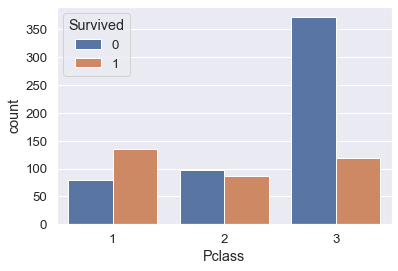

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


chi2 : 102.88898875696056
p-value : 4.549251711298793e-23
검증 결과 : 귀무가설 기각 / 즉, Pclass와 생존여부는 관계가 있다


In [7]:
### 시각화
sns.countplot(data=titanic_train, x='Pclass', hue='Survived')
plt.show()
### Pclass와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_p_cross = pd.crosstab(titanic_train['Pclass'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_p_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_p_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, Pclass와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, Pclass와 생존여부는 관계가 없다(독립이다)")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

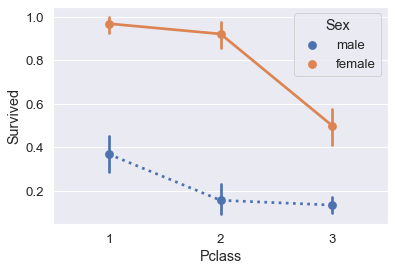

In [8]:
sns.pointplot(data=titanic_train,
            x='Pclass',
            y='Survived', hue='Sex', linestyles=[':', '-'])

### - 통계 가설 검정 및 시각화를 통해 Pclass Feature의 경우, 생존여부를 결정할 수 있는 Feature로 활용할 수 있을것으로 예상
### - 등급이 높을 수록(1,2등급) 생존자가 더 많았음을 확인

## 3) Name 컬럼 분석

In [9]:
## Name에서 호칭(Miss, Mr)feature 추출
titanic_train['Name_new'] = titanic_train['Name'].str.split(',', expand=True)[1]      ### 이름 부분 분리
titanic_train['Call_name'] =titanic_train['Name_new'].str.split('.', expand=True)[0]  ### 호칭부분 분리
titanic_train['Call_name'] = titanic_train['Call_name'].apply(lambda x : x.strip())   ### 앞뒤 공백 제거 수행
titanic_train = titanic_train.drop(columns=['Name_new'])

In [10]:
titanic_train['Call_name'].value_counts() ## 호칭별 수량 확인

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Jonkheer          1
Mme               1
Ms                1
Don               1
Lady              1
Capt              1
the Countess      1
Name: Call_name, dtype: int64

In [11]:
## 호칭 범주화 조정
# Master, Rev, Major, Col, Capt, Jonkheer, Sir, Don => Mr  
# Mlle, Mme, Ms => Miss
# the Countess, Lady => Mrs
# Dr의 경우 여성, 남성 구분

titanic_train.loc[titanic_train['Call_name'].isin(['Master', 'Rev', 'Major', 'Col', 'Capt', 'Jonkheer', 'Sir', 'Don']), 'Call_name'] = 'Mr'
titanic_train.loc[titanic_train['Call_name'].isin(['Mlle', 'Mme', 'Ms']), 'Call_name'] = 'Miss'
titanic_train.loc[titanic_train['Call_name'].isin(['the Countess', 'Lady']), 'Call_name'] = 'Mrs'
titanic_train.loc[(titanic_train['Call_name'] == 'Dr') & (titanic_train['Sex'] == 'male'), 'Call_name'] = 'Mr'
titanic_train.loc[(titanic_train['Call_name'] == 'Dr') & (titanic_train['Sex'] == 'female'), 'Call_name'] = 'Mrs'

In [12]:
titanic_train['Call_name'].value_counts() ## 호칭 범주화 조정 결과

Mr      577
Miss    186
Mrs     128
Name: Call_name, dtype: int64

<AxesSubplot:xlabel='Call_name', ylabel='count'>

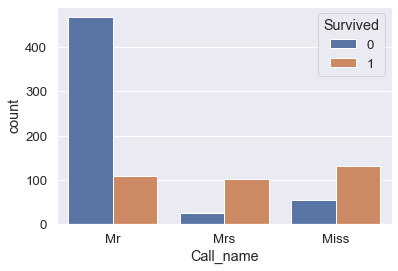

In [13]:
## Name 호칭별 생존률 분석
sns.countplot(data=titanic_train, x='Call_name', hue='Survived')

### 여성의 경우, 호칭에 따라 생존여부 결정에 관계가 있는지 추가 확인

In [14]:
## 여성 호칭과 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
df_a = titanic_train[titanic_train['Sex']=='female']
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(df_a['Call_name'], df_a['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 여성의 Call_name과 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 여성의 Call_name과 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Call_name,,
Miss,55,131
Mrs,26,102


chi2 : 3.394602874676176
p-value : 0.06541011249184824
검증 결과 : 귀무가설 채택 / 즉, 여성의 Call_name과 생존여부는 관계가 없다(독립이다)


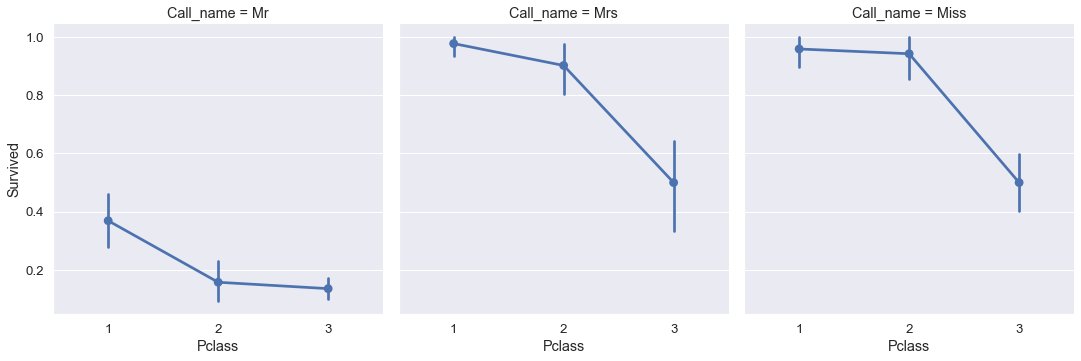

In [15]:
sns.catplot(data=titanic_train, col='Call_name', x='Pclass', y='Survived', kind='point')

### - 남성의 경우 1등급 객실 탑승객 생존률 높음
### - 여성은 호칭에 관계 없이 생존률 패턴이 유사하고, 1등급 객실 탑승객의 생존률이 높음

## 4) Sex 컬럼 분석

<AxesSubplot:xlabel='Sex', ylabel='count'>

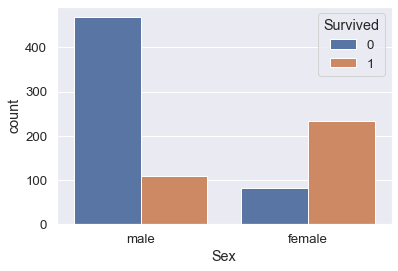

In [16]:
sns.countplot(data=titanic_train, x='Sex', hue='Survived')

In [17]:
## 성별과 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(titanic_train['Sex'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 성별과 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 성별과 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Sex,,
female,81,233
male,468,109


chi2 : 263.05057407065567
p-value : 3.711747770113424e-59
검증 결과 : 귀무가설 기각 / 즉, 성별과 생존여부는 관계가 있다


### 여성 생존자가 남성에 비해 월등히 높음..이는 가설 검정으로도 확인..따라서 성별과 생존여부는 관계가 있다

## 5) Age 컬럼 분석 

In [18]:
## 결측값을 채우기 위해 각 호칭에 따른 나이 중앙값 확인
titanic_train.groupby('Call_name')['Age'].median()

Call_name
Miss    21.5
Mr      29.0
Mrs     35.0
Name: Age, dtype: float64

In [19]:
## Age 결측값 채우기
titanic_train.loc[(titanic_train['Age'].isnull()) & (titanic_train['Call_name'] == 'Miss'), 'Age'] = 21.5
titanic_train.loc[(titanic_train['Age'].isnull()) & (titanic_train['Call_name'] == 'Mrs'), 'Age'] = 35.0
titanic_train.loc[(titanic_train['Age'].isnull()) & (titanic_train['Call_name'] == 'Mr'), 'Age'] = 29.0

In [20]:
## 결측값 여부 확인
titanic_train['Age'].isnull().sum()

0

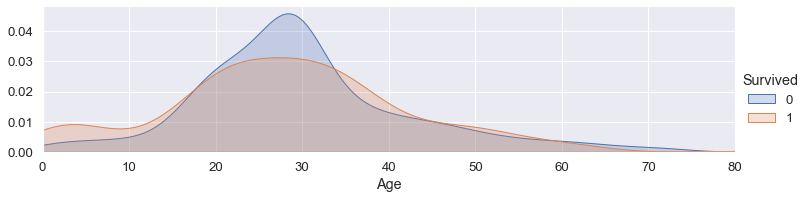

In [21]:
## 결측값 채운 후 연령에 따른 생존여부 시각화
facet=sns.FacetGrid(titanic_train,hue="Survived", aspect=3.5)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_train['Age'].max()))
facet.add_legend()

In [22]:
### Age를 10세 단위로 범주화
x = titanic_train['Age']
age_cat_cond = [x < 10, ((x>=10) & (x<20)), ((x>=20) & (x<30)), ((x>=30) & (x<40)), ((x>=40) & (x<50)), ((x>=50) & (x<60)), x>=60]
age_cat = ['child','teenager', '20s', '30s', '40s', '50s', 'over 60s']
titanic_train['Age_cat'] = np.select(age_cat_cond, age_cat)

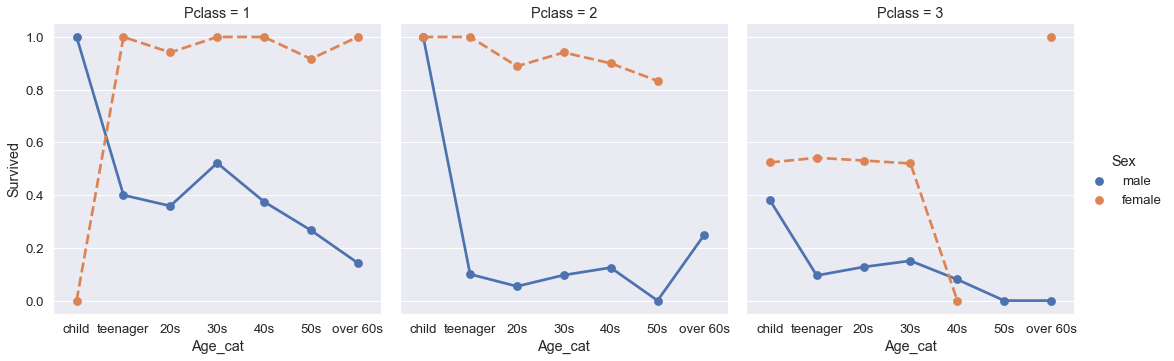

In [23]:
### 생존율과 Pclass, 연령대의 관계 분석
sns.catplot(data=titanic_train,
            x='Age_cat',
            y='Survived',
            col='Pclass', kind='point', hue='Sex', linestyles = ["-", "--"], 
            order=['child','teenager', '20s', '30s', '40s', '50s', 'over 60s'],
            ci=None)

### 여성의 경우 1등급 탑승객 중 Teenager, 30~40대의 생존율 높음
### 남성의 경우 전 등급에서 child, 1등급 30대의 생존률이 높게 나타남

In [24]:
## Age 범주와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(titanic_train['Age_cat'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 나이 범주와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 나이 범주와 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Age_cat,,
20s,265,115
30s,97,87
40s,55,34
50s,28,20
child,24,38
over 60s,19,7
teenager,61,41


chi2 : 32.3170908737634
p-value : 1.4185231595122295e-05
검증 결과 : 귀무가설 기각 / 즉, 나이 범주와 생존여부는 관계가 있다


In [25]:
### 가설 검정(남성) : 카이제곱 검정
from scipy.stats import chi2_contingency
import pandas as pd
df_male = titanic_train[titanic_train['Sex'] == 'male']

df_cross = pd.crosstab(df_male['Age_cat'], df_male['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 남성의 연령대와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 남성의 연령대와 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Age_cat,,
20s,231,41
30s,84,23
40s,45,12
50s,26,4
child,13,19
over 60s,19,3
teenager,50,7


chi2 : 40.09038693632814
p-value : 4.3725864227942975e-07
검증 결과 : 귀무가설 기각 / 즉, 남성의 연령대와 생존여부는 관계가 있다


In [26]:
### 가설 검정(여성) : 카이제곱 검정
from scipy.stats import chi2_contingency
import pandas as pd
df_female = titanic_train[titanic_train['Sex'] == 'female']

df_cross = pd.crosstab(df_female['Age_cat'], df_female['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 여성의 연령대와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 여성의 연령대와 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Age_cat,,
20s,34,74
30s,13,64
40s,10,22
50s,2,16
child,11,19
over 60s,0,4
teenager,11,34


chi2 : 10.829986107234028
p-value : 0.09377519742118237
검증 결과 : 귀무가설 채택 / 즉, 여성의 연령대와 생존여부는 관계가 없다(독립이다)


### 남성의 경우, 연령대가 생존여부에 영향을 미치는 것으로 나타났으나 여성의 경우는 영향을 미치지 않는 것으로 나타남 

## 6) SibSp(형제/자매/배우자) + Parch(부모/자식) 컬럼 분석

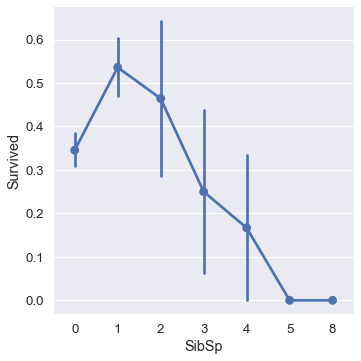

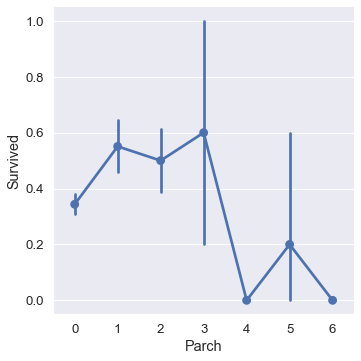

In [27]:
sns.catplot(data=titanic_train, 
            x='SibSp', y='Survived', kind='point')

sns.catplot(data=titanic_train,
            x='Parch', y='Survived', kind='point')

### 가족이 1명이 있는 경우 생존율이 가장 높으며 가족이 많을 수록 생존율은 떨어진다는 것을 확인
### 부모와 자식이 3명이 있는 승객의 생존율이 가장 높은 것을 확인

In [28]:
# SibSp + Parch 컬럼의 값을 합하여 Family_cnt feature생성
titanic_train['Family_cnt'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [29]:
## numpy select 이용 범주화
Family_size = titanic_train['Family_cnt']
f_size_cond = [(Family_size <= 1), (Family_size > 1) & (Family_size <=4), Family_size > 4]
f_cat = ['Solo', 'Small', 'Big']
titanic_train['Family_cat'] = np.select(f_size_cond, f_cat)

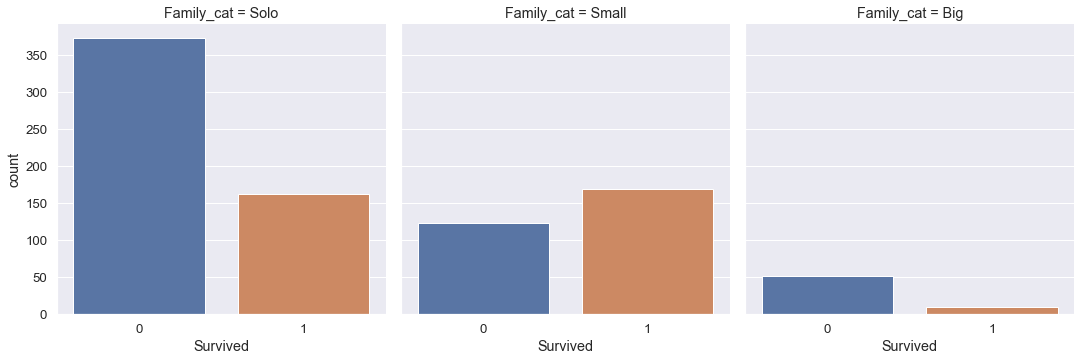

In [30]:
sns.catplot(data=titanic_train, x='Survived', kind='count', col='Family_cat', col_order=['Solo', 'Small', 'Big'])

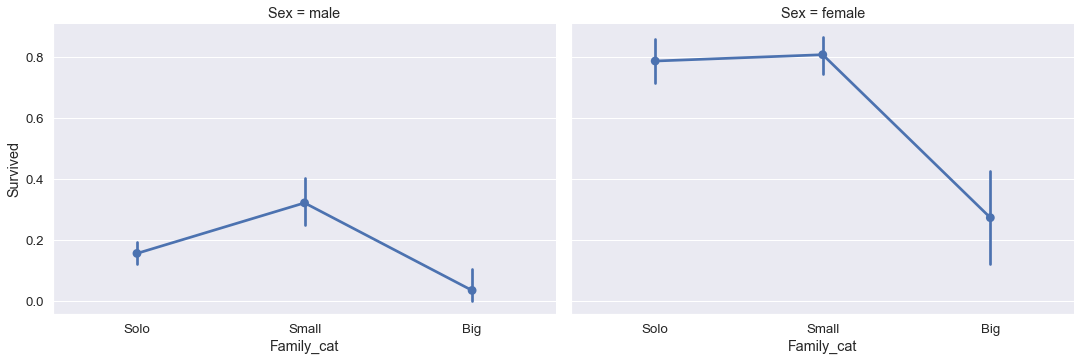

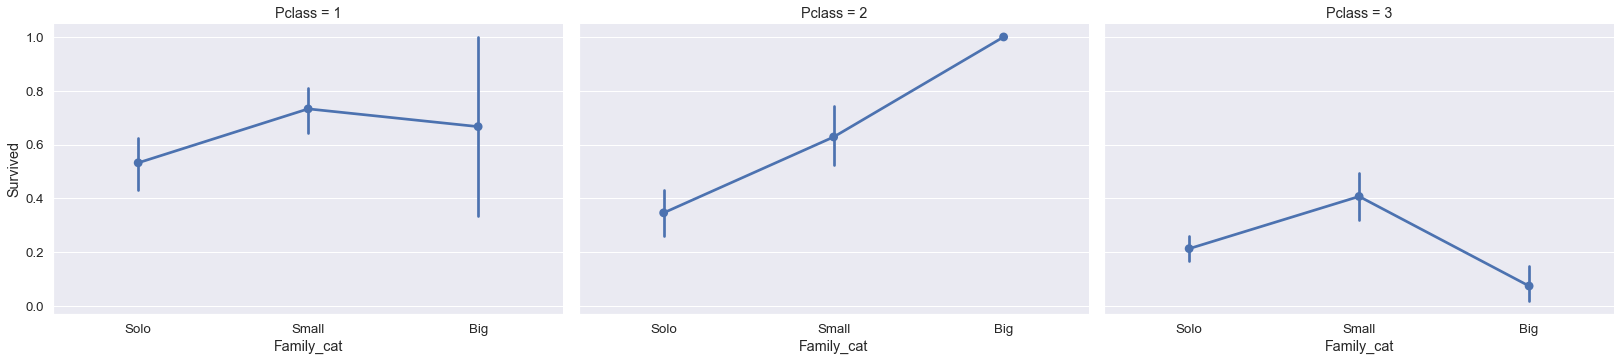

In [31]:
### 가족규모, 성별과 생존률 관계 분석
sns.catplot(data=titanic_train, aspect=1.5,
            x='Family_cat',
            y='Survived',
            col='Sex', kind='point',order=['Solo', 'Small', 'Big'])

### 가족규모, Pclass과 생존률 관계 분석
sns.catplot(data=titanic_train, aspect=1.5,
            x='Family_cat',
            y='Survived',
            col='Pclass', kind='point',order=['Solo', 'Small', 'Big'])

In [32]:
## 가족 규모와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(titanic_train['Family_cat'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 가족 규모와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 가족 규모와 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Family_cat,,
Big,52,10
Small,123,169
Solo,374,163


chi2 : 74.53724904698241
p-value : 6.522919536640423e-17
검증 결과 : 귀무가설 기각 / 즉, 가족 규모와 생존여부는 관계가 있다


### 단독 탑승객의 경우 생존율이 가장 낮고, 가족규모가 small(2~4인)인 경우 생존율이 높음
### 가족규모가 클 수록 생존율은 낮아짐, 가족규모가 큰 2등급 탑승객의 경우 생존율이 특이하게 높음을 확인 할 수 있었으나, 이는 모수가 작아 그런것으로 판단됨

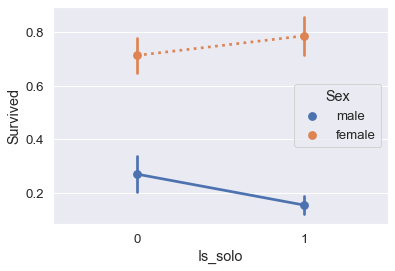

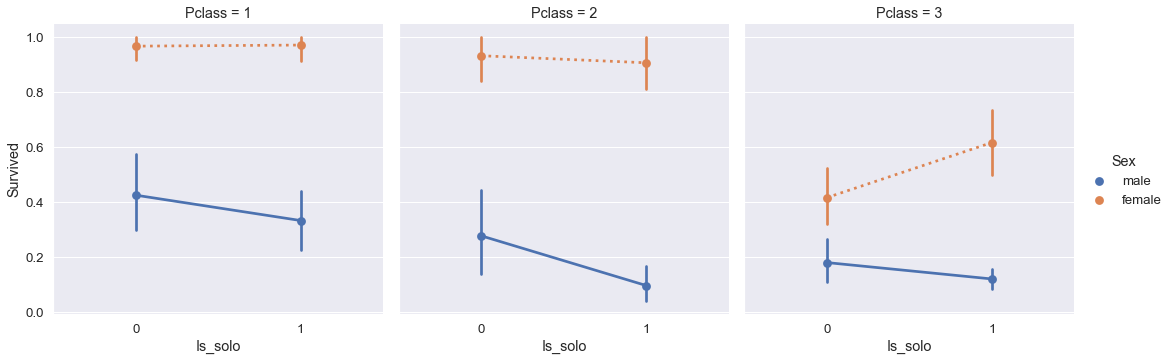

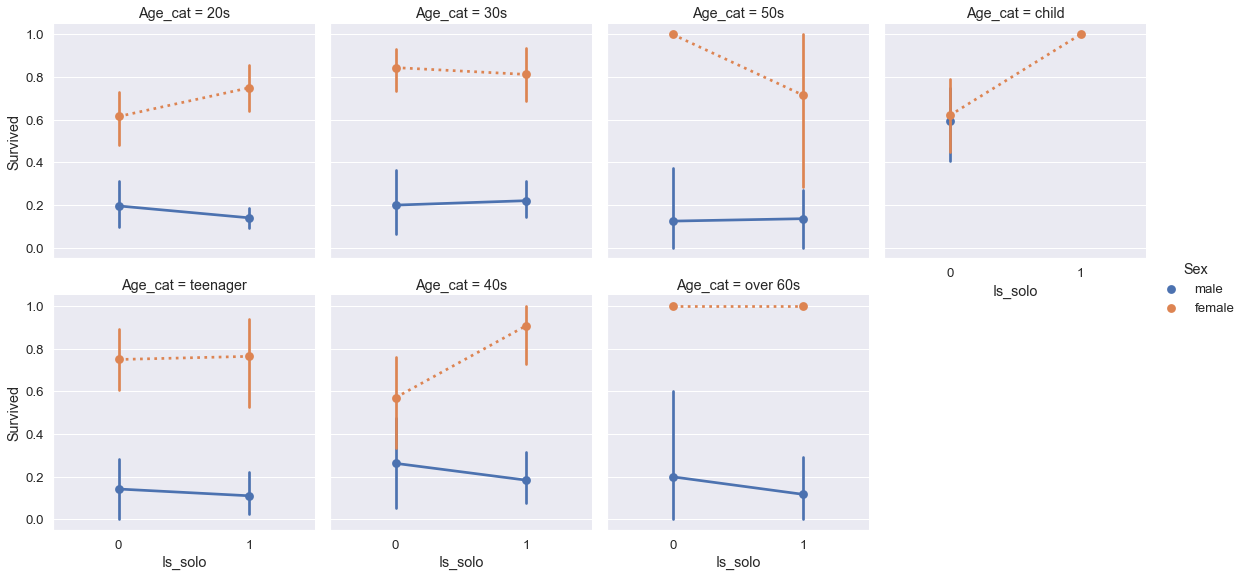

In [33]:
## Solo여부와 생존율 시각화
titanic_train['Is_solo'] = titanic_train['Family_cat'].apply(lambda x: 1 if x=='Solo' else 0)
sns.pointplot(data=titanic_train, x='Is_solo', y='Survived', hue='Sex', linestyles=['-', ':'])
sns.catplot(data=titanic_train, x='Is_solo', y='Survived', col='Pclass', kind='point', hue='Sex', linestyles=['-', ':'])
sns.catplot(data=titanic_train, x='Is_solo', y='Survived', kind='point', col='Age_cat', hue='Sex', height=4, col_wrap=4, linestyles=['-', ':'])

### 여성일 경우 솔로일때 생존확률이 남성보다 더 높음을 확인, 특히 3등급에 탑승한 솔로 여성 승객일 수록 높음
### 20대, 40대 솔로 여성의 경우 생존확률이 높았음을 확인, 남성의 경우 30대 솔로일 경우 생존확률이 약간 높았음을 확인

In [34]:
## 솔로여부와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(titanic_train['Is_solo'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 솔로 여부와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 솔로 여부와 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Is_solo,,
0,175,179
1,374,163


chi2 : 36.85013084754587
p-value : 1.2756752813177417e-09
검증 결과 : 귀무가설 기각 / 즉, 솔로 여부와 생존여부는 관계가 있다


## 7) Ticket 컬럼 분석 : 생존율에 영향을 미치지 않을 것으로 보여 Drop 해도 무방할 것으로 생각됨

## 8) Fare 컬럼 분석

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

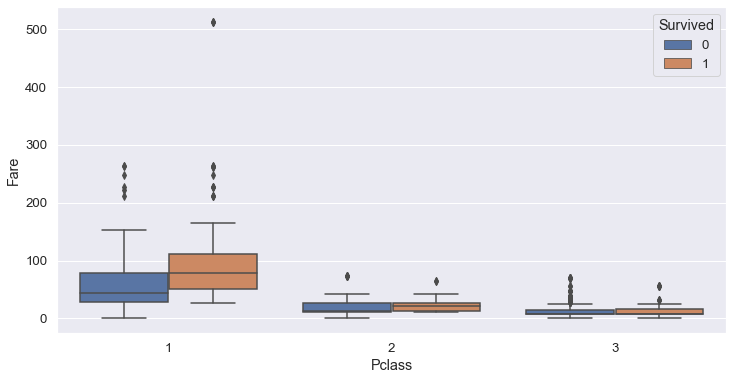

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=titanic_train, x='Pclass', y='Fare', hue='Survived')

### 1등급 객실일수록 요금이 높음
### 같은 1등급이더라도 생존율이 높은 탑승객의 경우 더 많은 요금을 지불

In [36]:
### qcut을 활용 4개 구간으로 범주화/라벨링
from sklearn.preprocessing import LabelEncoder
le_fare = LabelEncoder()
titanic_train['Fare_cat'] = le_fare.fit_transform(pd.qcut(titanic_train['Fare'], 4))

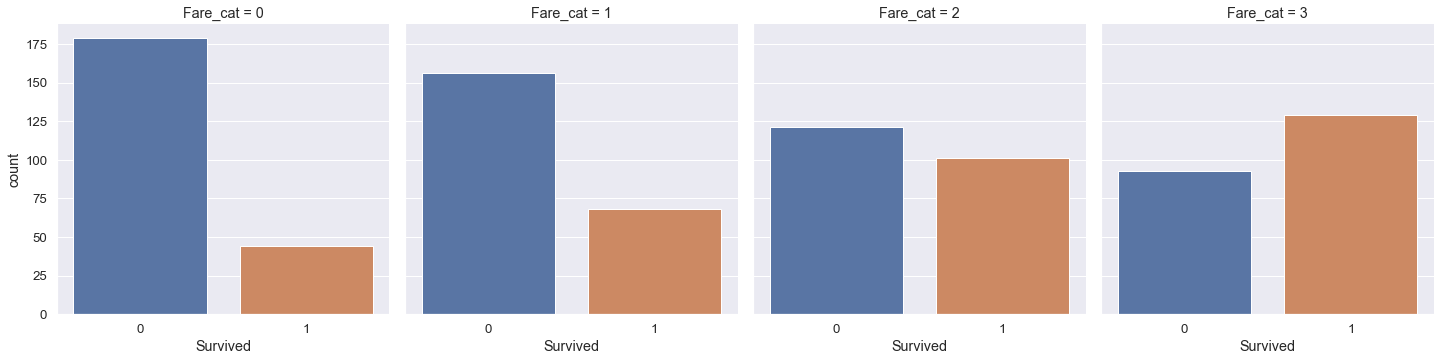

In [37]:
sns.catplot(data=titanic_train, x='Survived', col='Fare_cat', kind='count')

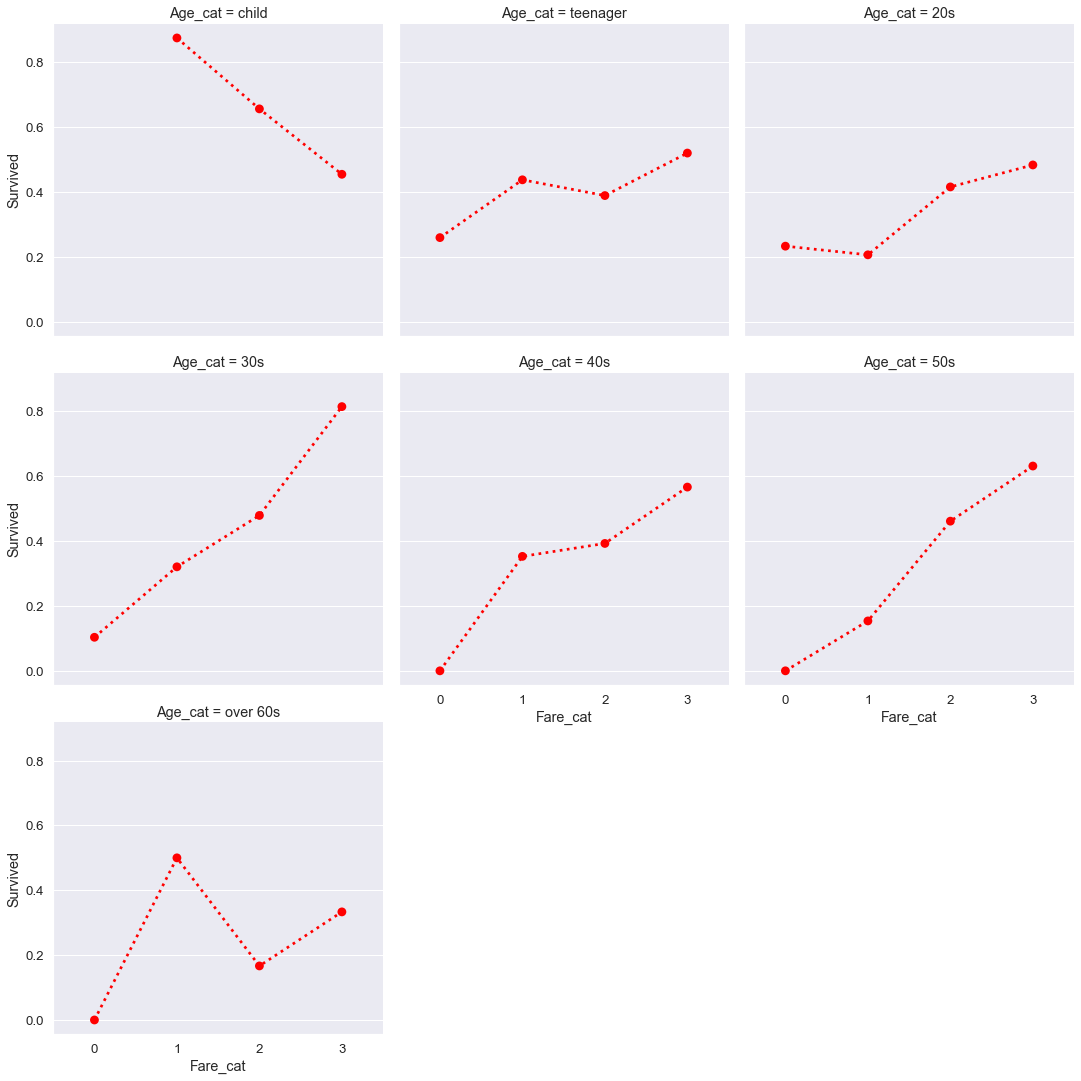

In [38]:
sns.catplot(data=titanic_train, x='Fare_cat', y='Survived', col='Age_cat', col_wrap=3,
            col_order=['child', 'teenager', '20s', '30s', '40s', '50s', 'over 60s'],
            kind='point', linestyles=[':'], color='red', ci=None)

### 높은 요금을 지불한 child의 생존율이 그렇지 않은 사람 대비 낮은 생존율을 보이는 특이사항이 확인됨
### 그 외 연령에서는 대체적으로 높은 요금을 지불한 탑승객일 수록 생존율 높음 

In [39]:
## Fare_cat과 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(titanic_train['Fare_cat'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 요금 레벨과 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 요금 레벨과 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Fare_cat,,
0,179,44
1,156,68
2,121,101
3,93,129


chi2 : 80.17393102947467
p-value : 2.816616687453629e-17
검증 결과 : 귀무가설 기각 / 즉, 요금 레벨과 생존여부는 관계가 있다


## 9) Cabin 컬럼 분석

In [40]:
### 해당컬럼의 알파벳에서 의미있는 단서를 찾을 수 있을 듯 하여 slicing한 뒤 별도 컬럼에 저장
titanic_train['Cabin_init'] = titanic_train.loc[titanic_train['Cabin'].notnull(), 'Cabin'].apply(lambda x: x[:1]) 

In [41]:
## Cabin의 경우 Pclass, Fare와 연관성이 있을 것으로 예상하여 확인해보기로 함
## 별도의 데이터 프레임 생성/분석
df_cabin_analyze = titanic_train.groupby(['Pclass', 'Cabin_init']).agg({'Fare' :['mean', 'median', 'max'], 'Survived' :['size', 'sum']})
df_cabin_analyze[('Survived', 'Survived ratio')] = round((df_cabin_analyze[('Survived', 'sum')] / df_cabin_analyze[('Survived', 'size')] * 100), 2)
df_cabin_analyze.style.bar(subset=[('Survived', 'Survived ratio')], color='#37718e')

### Cabin의 차이에 따라 생존률에 차이가 있는것으로 보여서..결측값이 많음에도 불구하고 이를 전처리(결측값 채우기)하기로 함;;

In [42]:
### 각 Pclass별 Cabin_init에 해당하는 median값 추출
median_val = df_cabin_analyze[('Fare', 'median')].values
median_val_pclass1 = median_val[:6]   ## Pclass 1에 해당하는 Fare median 
median_val_pclass2 = median_val[6:9]  ## Pclass 2에 해당하는 Fare median
median_val_pclass3 = median_val[9:]   ## Pclass 3에 해당하는 Fare median

In [43]:
### Pclass가 1이고, Cabin_init이 Null인 행의 Fare값 확인
print(titanic_train.loc[(titanic_train['Pclass'] == 1) & (titanic_train['Cabin_init'].isnull())].shape)
print(titanic_train.loc[(titanic_train['Pclass'] == 1) & (titanic_train['Cabin_init'].isnull()), "Fare"])

(40, 19)
30      27.7208
34      82.1708
35      52.0000
64      27.7208
83      47.1000
155     61.3792
168     25.9250
187     26.5500
256     79.2000
258    512.3292
270     31.0000
290     78.8500
295     27.7208
306    110.8833
334    133.6500
373    135.6333
375     82.1708
380    227.5250
383     52.0000
447     26.5500
467     26.5500
493     49.5042
507     26.5500
513     59.4000
537    106.4250
545     26.0000
555     26.5500
557    227.5250
602     42.4000
604     26.5500
607     30.5000
633      0.0000
660    133.6500
694     26.5500
708    151.5500
766     39.6000
793     30.6958
822      0.0000
842     31.0000
856    164.8667
Name: Fare, dtype: float64


In [44]:
### Pclass가 1이고, Cabin_init이 Null인 행의 Cabin_init에 대해 채우기
### median_val_pclass1와 각 Fare의 차이의 절대값이 가장 작은 index(argmin)를 취하도록 함 
lst_pclass1 = []
for i in range(titanic_train.loc[(titanic_train['Pclass'] == 1) & (titanic_train['Cabin_init'].isnull()), "Fare"].shape[0]):
    lst_pclass1.append(np.argmin(np.abs(median_val_pclass1 - list(titanic_train.loc[(titanic_train['Pclass'] == 1) & (titanic_train['Cabin_init'].isnull()), "Fare"])[i])))

print(lst_pclass1)

### 각 argmin에 대응되는 cabin_init값 대체
lst_pclass1_result = []
for val in lst_pclass1:
    if val == 0:
        lst_pclass1_result.append('A')
    elif val == 1:
        lst_pclass1_result.append('B')
    elif val == 2:
        lst_pclass1_result.append('C')
    elif val == 3:
        lst_pclass1_result.append('D')
    elif val == 4:
        lst_pclass1_result.append('E')
    elif val == 5:
        lst_pclass1_result.append('T')
print(lst_pclass1_result)
print(len(lst_pclass1_result))


[0, 2, 4, 0, 4, 4, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 4, 0, 0, 4, 0, 4, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2]
['A', 'C', 'E', 'A', 'E', 'E', 'A', 'A', 'B', 'C', 'A', 'B', 'A', 'C', 'C', 'C', 'C', 'C', 'E', 'A', 'A', 'E', 'A', 'E', 'C', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'A', 'C']
40


In [45]:
### Pclass가 2이고, Cabin_init이 Null인 행의 Fare값 확인
print(titanic_train.loc[(titanic_train['Pclass'] == 2) & (titanic_train['Cabin_init'].isnull())].shape)
print(titanic_train.loc[(titanic_train['Pclass'] == 2) & (titanic_train['Cabin_init'].isnull()), "Fare"])

(168, 19)
9      30.0708
15     16.0000
17     13.0000
20     26.0000
33     10.5000
        ...   
866    13.8583
874    24.0000
880    26.0000
883    10.5000
886    13.0000
Name: Fare, Length: 168, dtype: float64


In [46]:
### Pclass가 2이고, Cabin_init이 Null인 행의 Cabin_init에 대해 채우기
### median_val_pclass2와 각 Fare의 차이의 절대값이 가장 작은 index(argmin)를 취하도록 함 
lst_pclass2 = []
for i in range(titanic_train.loc[(titanic_train['Pclass'] == 2) & (titanic_train['Cabin_init'].isnull()), "Fare"].shape[0]):
    lst_pclass2.append(np.argmin(np.abs(median_val_pclass2 - list(titanic_train.loc[(titanic_train['Pclass'] == 2) & (titanic_train['Cabin_init'].isnull()), "Fare"])[i])))

print(lst_pclass2)
### 각 argmin에 대응되는 cabin_init값 대체
lst_pclass2_result = []
for val in lst_pclass2:
    if val == 0:
        lst_pclass2_result.append('D')
    elif val == 1:
        lst_pclass2_result.append('E')
    elif val == 2:
        lst_pclass2_result.append('F')

print(lst_pclass2_result)
print(len(lst_pclass2_result))

[2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0]
['F', 'D', 'D', 'F', 'E', 'F', 'F', 'F', 'E', 'F', 'E', 'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'D', 'E', 'F', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'F', 'D', 'F', 'E', 'D', 'E', 'D', 'D', 'E', 'F', 'F', 'E', 'D', 'E', 'D', 'F', 'F', 'E', 'D', 'E', 'D', 'F', 'F', 'F', 'F', 'D', 'D', 'F', 'D', 'D', 'D', 'D', 'D', 'F', 'F', 'D', 'E', 'F', 'E', 'D', 'F', 'D', 'E', 'F', 'D', 'D', 'F', 'F', 'F', 'D', 'E', 'F', 'D', 'D', 'F', 'E', 'D', 'E', 'F', 'F', 'E', 'F', 'F', 'E', 'E', 'F', 'F',

In [47]:
### Pclass가 3이고, Cabin_init이 Null인 행의 Fare값 확인
print(titanic_train.loc[(titanic_train['Pclass'] == 3) & (titanic_train['Cabin_init'].isnull())].shape)
print(titanic_train.loc[(titanic_train['Pclass'] == 3) & (titanic_train['Cabin_init'].isnull()), "Fare"])

(479, 19)
0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
882    10.5167
884     7.0500
885    29.1250
888    23.4500
890     7.7500
Name: Fare, Length: 479, dtype: float64


In [48]:
### Pclass가 3이고, Cabin_init이 Null인 행의 Cabin_init에 대해 채우기
### median_val_pclass3와 각 Fare의 차이의 절대값이 가장 작은 index(argmin)를 취하도록 함 
lst_pclass3 = []
for i in range(titanic_train.loc[(titanic_train['Pclass'] == 3) & (titanic_train['Cabin_init'].isnull()), "Fare"].shape[0]):
    lst_pclass3.append(np.argmin(np.abs(median_val_pclass3 - list(titanic_train.loc[(titanic_train['Pclass'] == 3) & (titanic_train['Cabin_init'].isnull()), "Fare"])[i])))

print(lst_pclass3)
### 각 argmin에 대응되는 cabin_init값 대체
lst_pclass3_result = []
for val in lst_pclass3:
    if val == 0:
        lst_pclass3_result.append('E')
    elif val == 1:
        lst_pclass3_result.append('F')
    elif val == 2:
        lst_pclass3_result.append('G')

print(lst_pclass3_result)
print(len(lst_pclass3_result))

[1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 

In [49]:
### Cabin_init 결측값 채우기
titanic_train.loc[(titanic_train['Pclass'] == 1) & (titanic_train['Cabin_init'].isnull()), "Cabin_init"] = lst_pclass1_result
titanic_train.loc[(titanic_train['Pclass'] == 2) & (titanic_train['Cabin_init'].isnull()), "Cabin_init"] = lst_pclass2_result
titanic_train.loc[(titanic_train['Pclass'] == 3) & (titanic_train['Cabin_init'].isnull()), "Cabin_init"] = lst_pclass3_result

In [50]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Call_name    891 non-null    object 
 13  Age_cat      891 non-null    object 
 14  Family_cnt   891 non-null    int64  
 15  Family_cat   891 non-null    object 
 16  Is_solo      891 non-null    int64  
 17  Fare_cat     891 non-null    int32  
 18  Cabin_init   891 non-null    object 
dtypes: float

In [51]:
### 결측값 처리 후 재확인
df_cabin_analyze_fin = titanic_train.groupby(['Pclass', 'Cabin_init']).agg({'Fare' :['mean', 'median', 'max'], 'Survived' :['size', 'sum']})
df_cabin_analyze_fin[('Survived', 'Survived ratio')] = round((df_cabin_analyze[('Survived', 'sum')] / df_cabin_analyze[('Survived', 'size')] * 100), 2)
df_cabin_analyze_fin.style.bar(subset=[('Survived', 'Survived ratio')], color='#37718e')

## 9) Embarked 컬럼 분석

In [52]:
## 2개의 결측치 확인
titanic_train['Embarked'].isnull().sum()

2

<AxesSubplot:xlabel='Embarked', ylabel='count'>

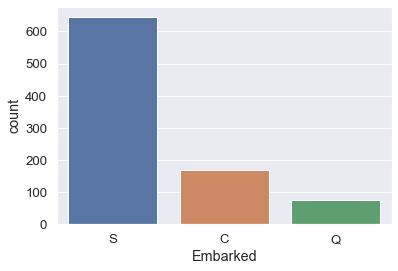

In [53]:
sns.countplot(x=titanic_train['Embarked'])

In [54]:
## 단순하게 S(Southampton)에서 탑승한 사람이 많으므로 2개 결측치는 S로 대체
titanic_train.loc[titanic_train['Embarked'].isnull(), "Embarked"] = 'S'

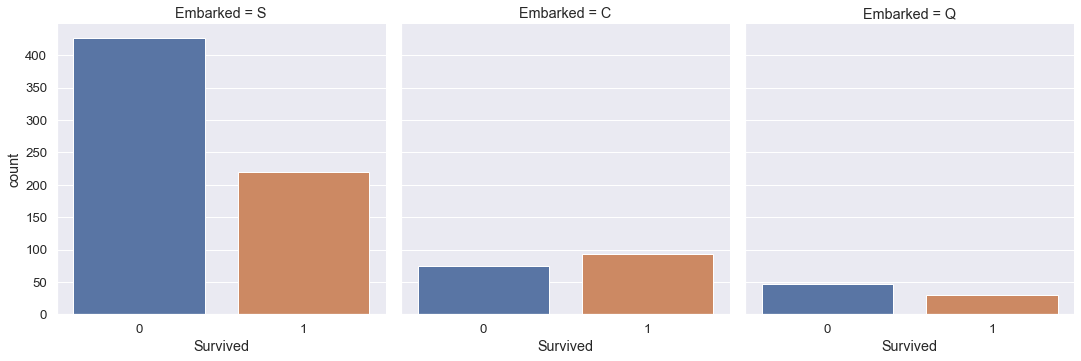

In [55]:
sns.catplot(data=titanic_train, col='Embarked', x='Survived', kind='count')

### 탑승 위치가 C인 경우, 상대적으로 생존률이 높았음을 확인

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

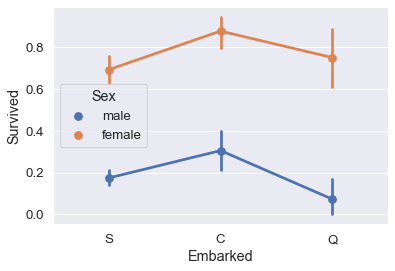

In [56]:
sns.pointplot(data=titanic_train, x='Embarked', y='Survived', hue='Sex')

In [57]:
## 탑승위치와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(titanic_train['Embarked'], titanic_train['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 탑승위치와 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 탑승위치와 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


chi2 : 25.964452881874784
p-value : 2.3008626481449577e-06
검증 결과 : 귀무가설 기각 / 즉, 탑승위치와 생존여부는 관계가 있다


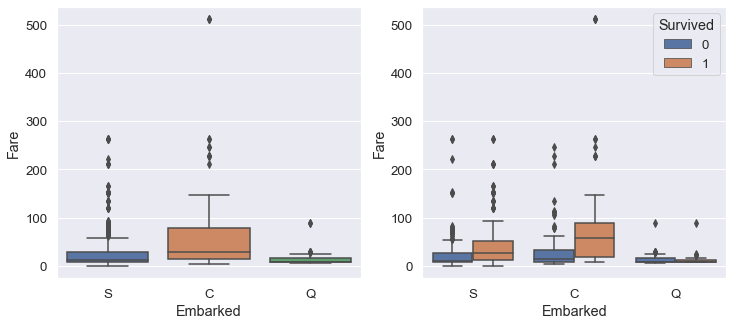

In [58]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(data=titanic_train, x='Embarked', y='Fare', ax=ax[0])
sns.boxplot(data=titanic_train, x='Embarked', y='Fare', hue='Survived', ax=ax[1])
plt.show()

### C의 경우, 다른 탑승위치 대비 상대적으로 높은 요금을 지불한 것으로 확인
### Q의 경우 대부분의 탑승객은 낮은 요금을 지불하고 탑승한 것으로 보임
### 같은 탑승 위치더라도, S,C의 경우 요금을 더 높게 지불한 사람이 생존확률이 더 높음을 확인

In [59]:
## 불필요한 컬럼 삭제
titanic_train_clean = titanic_train.drop(columns=['PassengerId','Name','Ticket','Cabin', 'Family_cnt', 'Age', 'Fare'])
titanic_train_clean

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Call_name,Age_cat,Family_cat,Is_solo,Fare_cat,Cabin_init
0,0,3,male,1,0,S,Mr,20s,Small,0,0,F
1,1,1,female,1,0,C,Mrs,30s,Small,0,3,C
2,1,3,female,0,0,S,Miss,20s,Solo,1,1,F
3,1,1,female,1,0,S,Mrs,30s,Small,0,3,C
4,0,3,male,0,0,S,Mr,30s,Solo,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Mr,20s,Solo,1,1,D
887,1,1,female,0,0,S,Miss,teenager,Solo,1,2,B
888,0,3,female,1,2,S,Miss,20s,Small,0,2,G
889,1,1,male,0,0,C,Mr,20s,Solo,1,2,C


In [60]:
## 범주형 데이터 ohe
titanic_train_clean_ohe = \
pd.get_dummies(titanic_train_clean, columns=['Pclass', 'Embarked', 'Call_name', 'Age_cat', 'Family_cat', 'Fare_cat', 'Is_solo' ,'Sex', 'Cabin_init'])

In [61]:
corr = titanic_train_clean_ohe.corr()

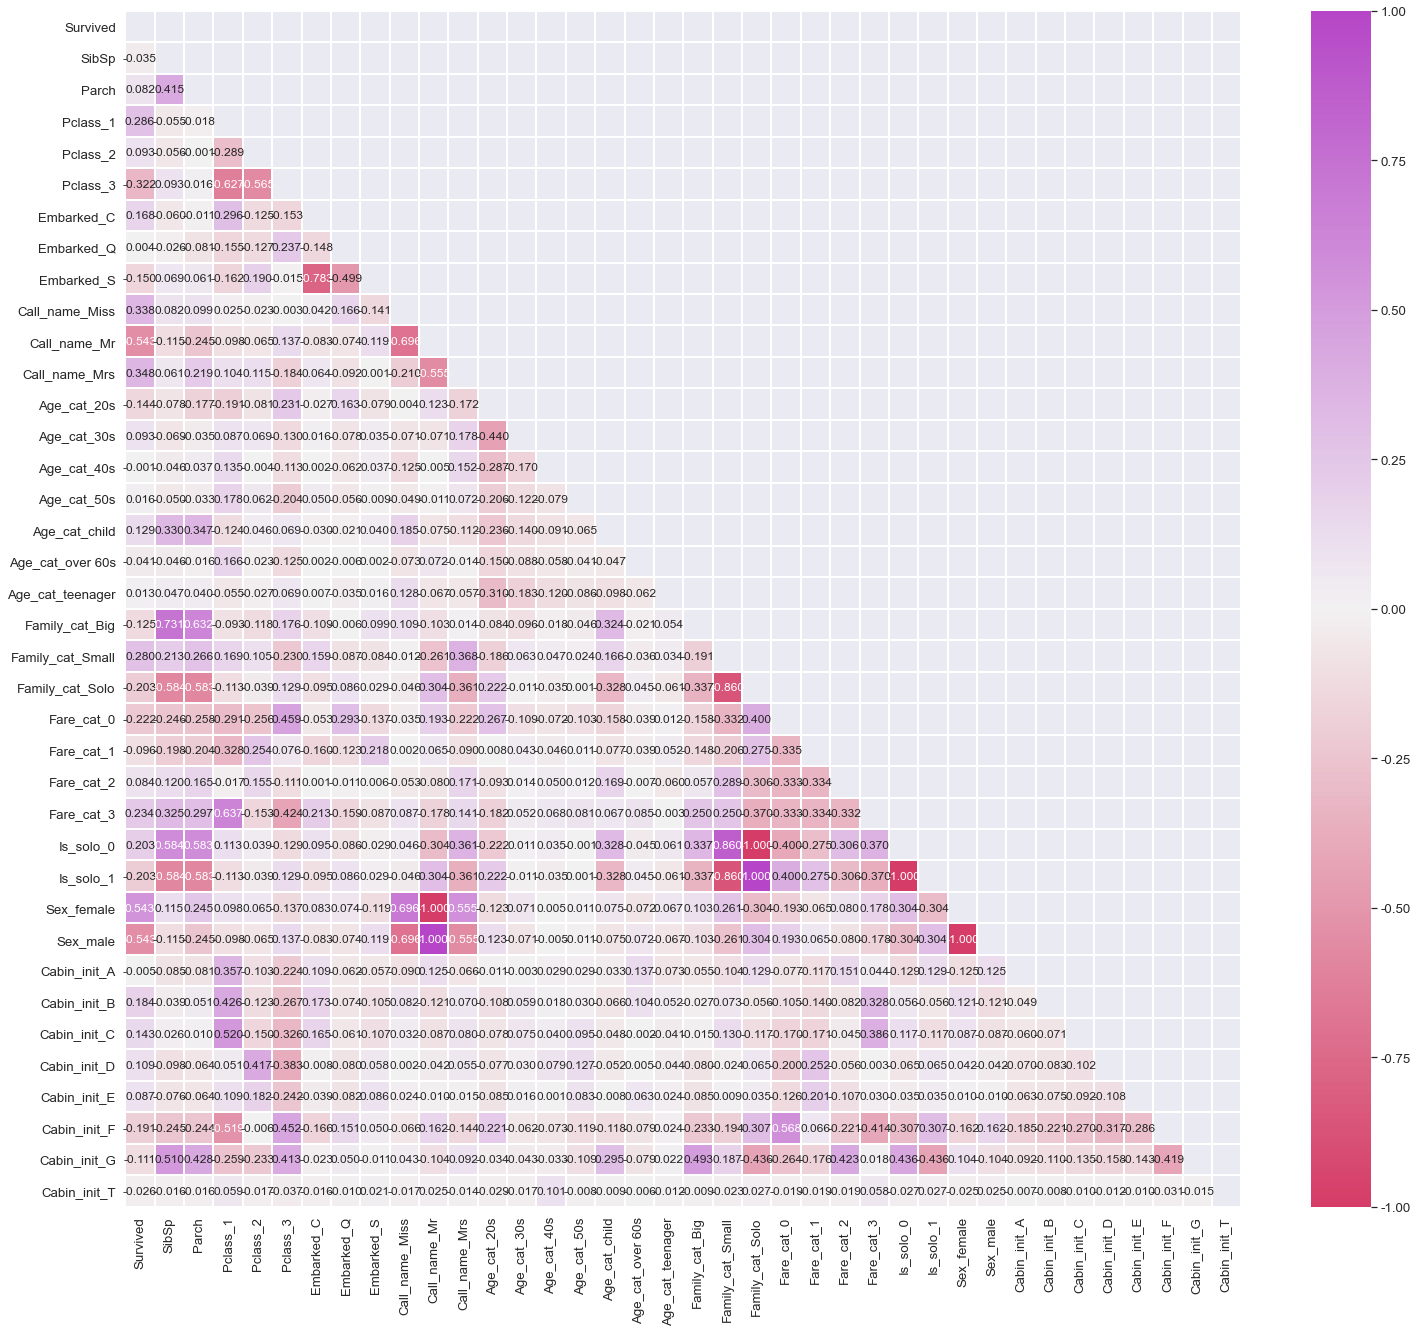

In [62]:
## 상관관계 분석
fig, ax = plt.subplots(figsize=(25,22))
cmap = sns.diverging_palette(1,300, as_cmap=True)
sns.heatmap(corr, mask=np.triu(np.ones_like(titanic_train_clean_ohe.corr())), 
            cmap=cmap, vmax=1, vmin=-1, center=0, linewidth=2, annot=True, fmt=".3f",annot_kws={'size':12})
plt.show()

In [63]:
X = titanic_train_clean_ohe.iloc[:, 1:]
Y = titanic_train_clean_ohe.iloc[:, 0]

In [69]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import AdaBoostClassifier #support AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [70]:
### Cross validation 이용하여 모델별 정확도 확인
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10)
CV_means = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=10)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
    cv_result=cv_result
    CV_means.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':CV_means,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.810337,0.030667
Radial Svm,0.830549,0.037639
Logistic Regression,0.820462,0.023775
KNN,0.818240,0.035781
Decision Tree,0.808090,0.023723
Naive Bayes,0.699176,0.068452
Random Forest,0.812634,0.047612


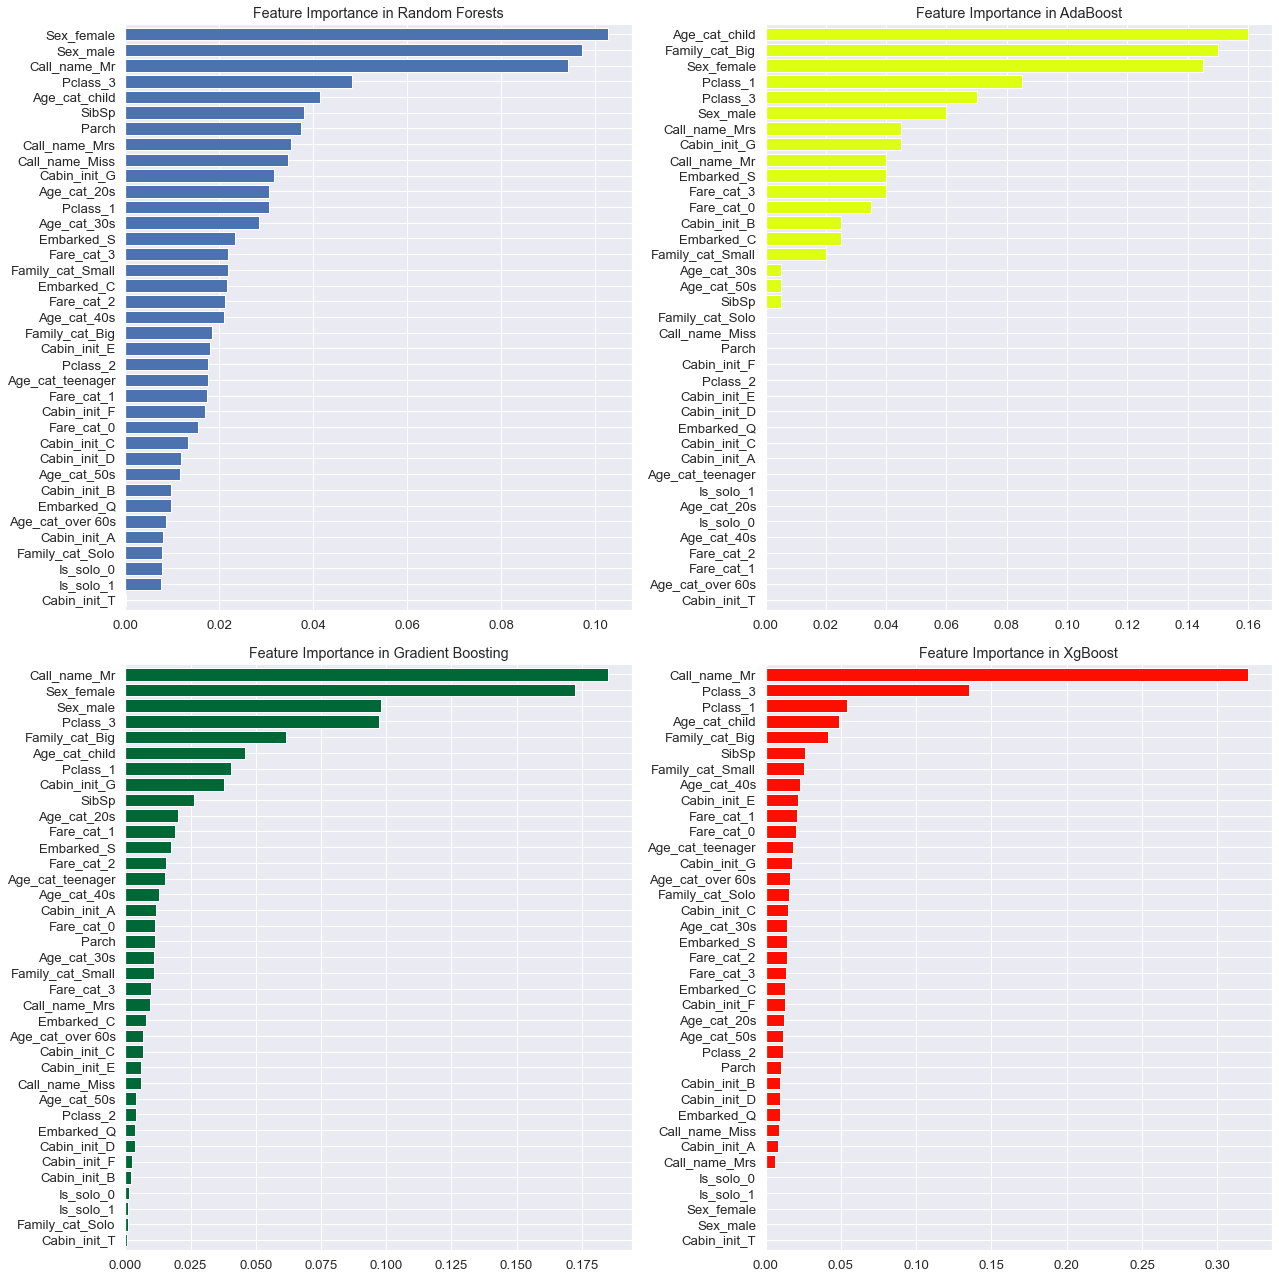

In [77]:
### 모델별 Feature Importance
f,ax=plt.subplots(2,2,figsize=(18,18))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1, eval_metric='mlogloss')
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.tight_layout()
plt.show()